In [119]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv(r"C:\Users\OMEN\Desktop\Work\Data_Preprocessing_Task1\Titanic-Dataset.csv")

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
print(len(df))


891


In [125]:
# Check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [126]:
# Fill missing numeric columns with mean 
df['Age'] = df['Age'].fillna(df['Age'].mean()) 


In [127]:
# Check missing values for Age column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [128]:
# For categorical columns, use mode 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0 ])


In [129]:
# Check missing values for Age column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [130]:
df['Cabin'] = df['Cabin'].fillna('Unknown')


In [131]:
# Check missing values for Age column
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Convert categorical features into numerical using encoding


In [132]:
#Find all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", cat_cols.tolist())


Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [133]:
#Check number of unique values in each categorical column
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 148 unique values
Embarked: 3 unique values


In [134]:
#Classify into binary and multi-class
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
multi_class_cols = [col for col in cat_cols if df[col].nunique() > 2]

print("Binary categorical columns:", binary_cols)
print("Multi-class categorical columns:", multi_class_cols)


Binary categorical columns: ['Sex']
Multi-class categorical columns: ['Name', 'Ticket', 'Cabin', 'Embarked']


In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
#Drop high-cardinality useless columns (Name, Ticket)
df.drop(columns=['Name', 'Ticket'], inplace=True)


In [137]:
#Extract deck from Cabin
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Deck'] = df['Cabin'].str[0]  # First character like 'C', 'D', etc.
df.drop(columns=['Cabin'], inplace=True)


In [138]:
# Encode Sex with LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0 (usually)



In [139]:
#One-hot encode Embarked and new Deck column
df = pd.get_dummies(df, columns=['Embarked', 'Deck'], drop_first=True)


In [140]:
print(df.info())  # Should be clean and manageable now


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  Deck_B       891 non-null    bool   
 11  Deck_C       891 non-null    bool   
 12  Deck_D       891 non-null    bool   
 13  Deck_E       891 non-null    bool   
 14  Deck_F       891 non-null    bool   
 15  Deck_G       891 non-null    bool   
 16  Deck_T       891 non-null    bool   
 17  Deck_U       891 non-null    bool   
dtypes: bool(10), float64(2), int32(1), int64(5)
memory

Normalize / Standardize numerical features

Standardization (Z-score)

In [141]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std


Visualize outliers using boxplots & remove them

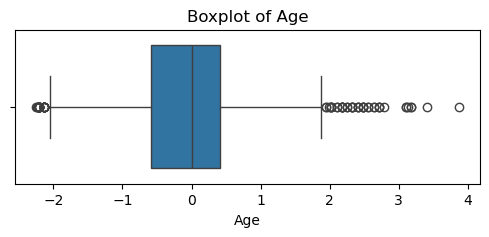

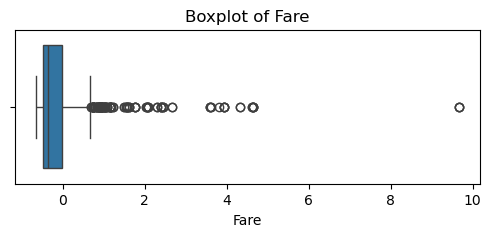

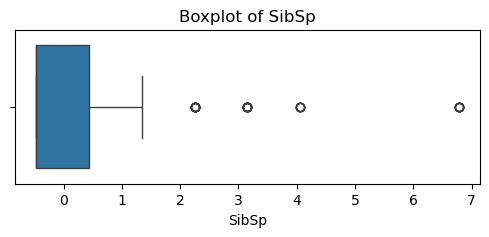

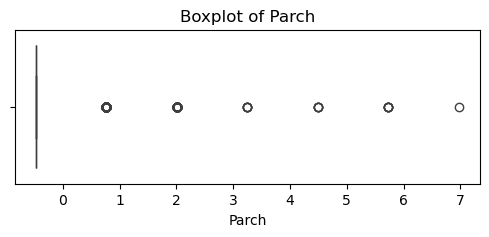

In [143]:


for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Outliers removal

In [144]:
from scipy import stats

# Z-score threshold
z_scores = stats.zscore(df[num_cols])
abs_z_scores = abs(z_scores)

# Keep rows where all z-scores < 3
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]


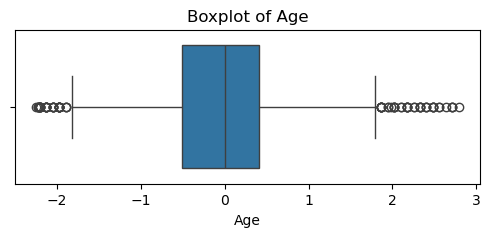

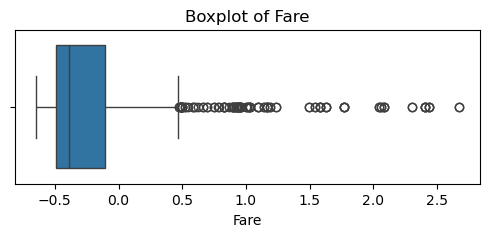

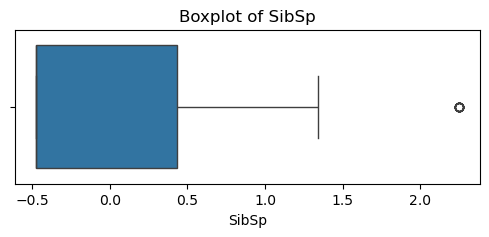

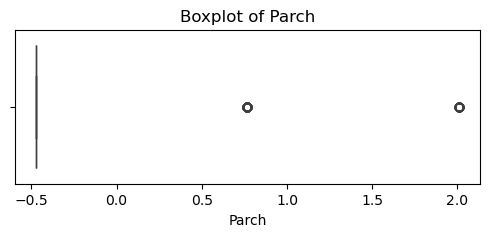

In [145]:
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
